In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("D:/ml/Salary Prediction Data/Salary Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [16]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Simple Linear Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")

Simple Linear Regression:
  MSE: 49830096.8559
  R2 Score: 0.9024


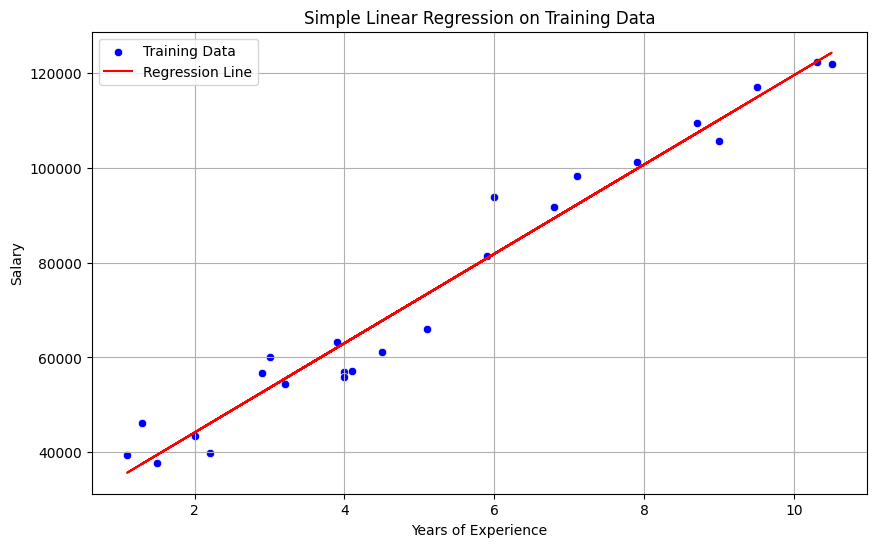

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['YearsExperience'], y=y_train, color='blue', label='Training Data')
plt.plot(X_train['YearsExperience'], lr.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression on Training Data')
plt.legend()
plt.grid(True)
plt.show()

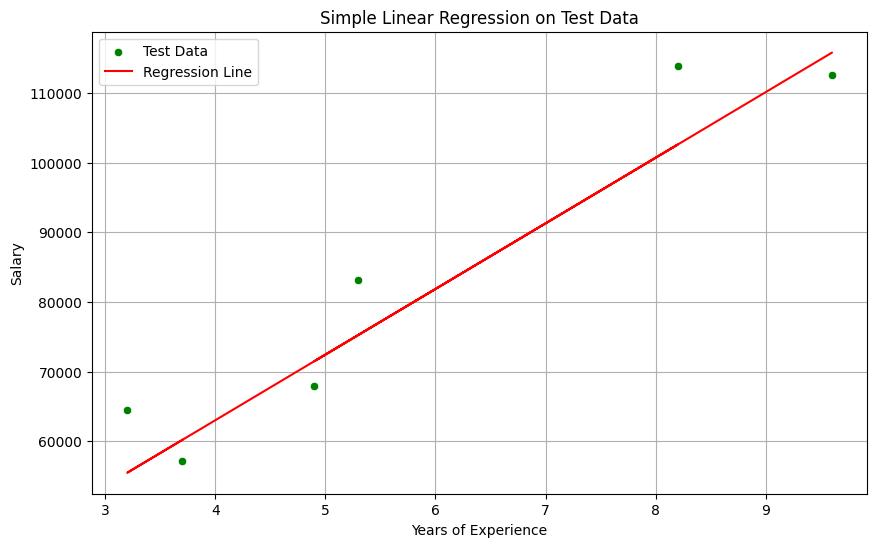

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='green', label='Test Data')
plt.plot(X_test['YearsExperience'], y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression on Test Data')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

print(f"\nPolynomial Regression (Degree {poly_features.degree}):")
print(f"  MSE: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"  R2 Score: {r2_score(y_test, y_pred_poly):.4f}")


Polynomial Regression (Degree 3):
  MSE: 48605815.3319
  R2 Score: 0.9048


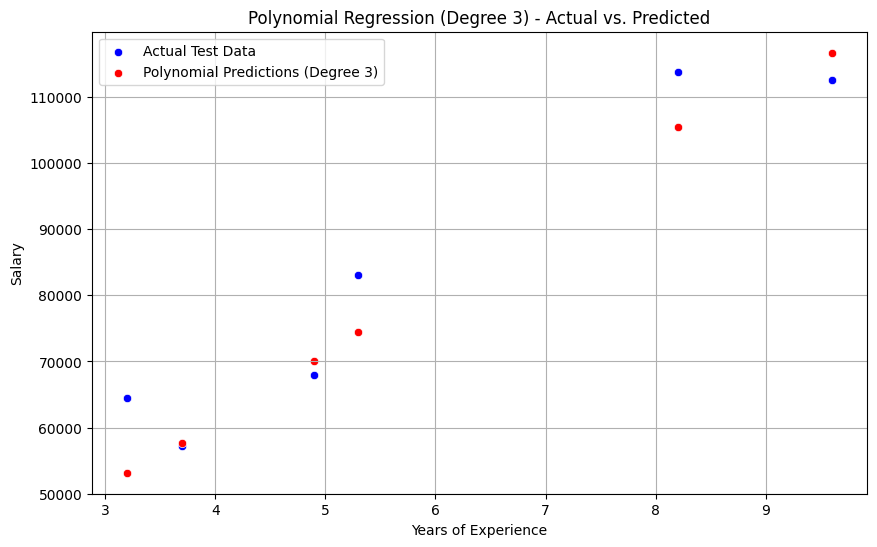

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Actual Test Data')
sns.scatterplot(x=X_test['YearsExperience'], y=y_pred_poly, color='red', label='Polynomial Predictions (Degree 3)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 3) - Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("\nRidge Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)


Ridge Regression:
MSE: 49974852.7200
R2 Score: 0.9022
Coefficients: [9376.74948964]
Intercept: 25565.73702249331


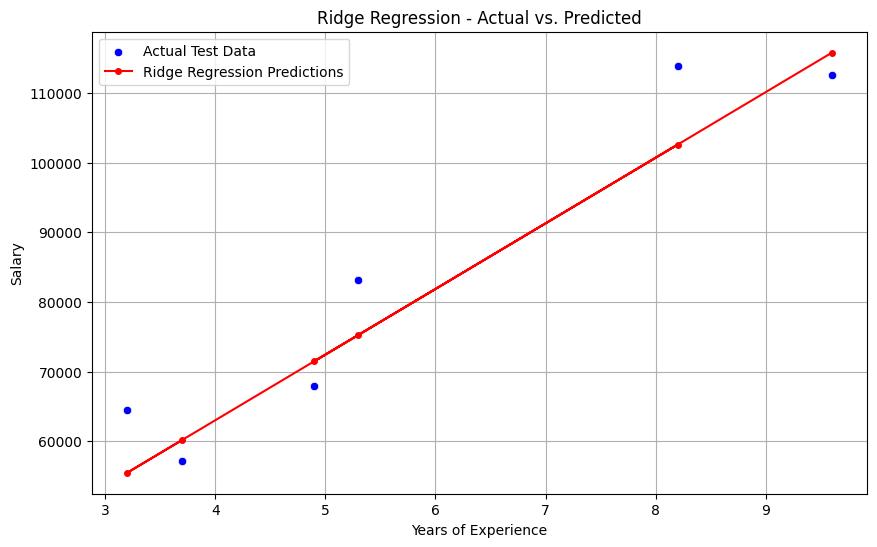

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Actual Test Data')
plt.plot(X_test['YearsExperience'], y_pred, color='red', marker='o', linestyle='-', markersize=4, label='Ridge Regression Predictions')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Ridge Regression - Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nRandom Forest Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")


Random Forest Regression:
  MSE: 63721129.7130
  R2 Score: 0.8753


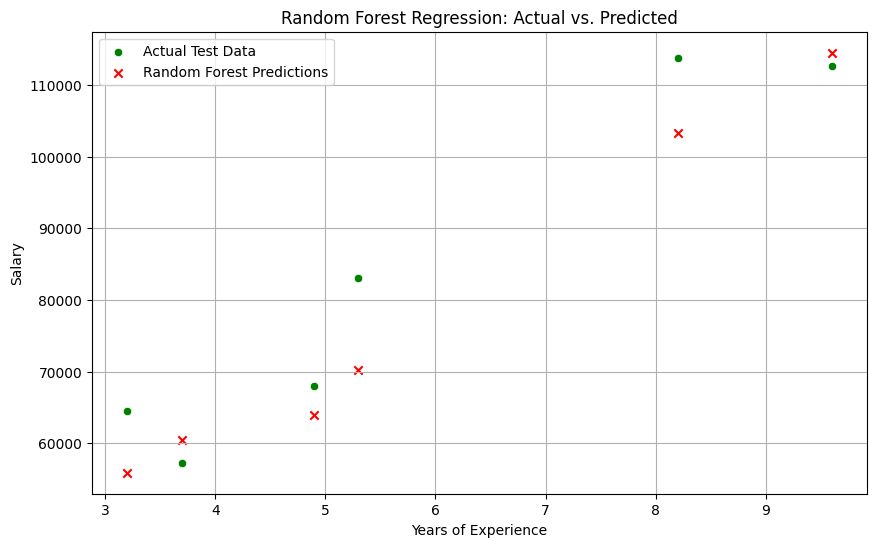

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='green', label='Actual Test Data')
plt.scatter(X_test['YearsExperience'], rf.predict(X_test), color='red', label='Random Forest Predictions', marker='x')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("\nDecision Tree Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")


Decision Tree Regression:
  MSE: 101047709.8333
  R2 Score: 0.8022


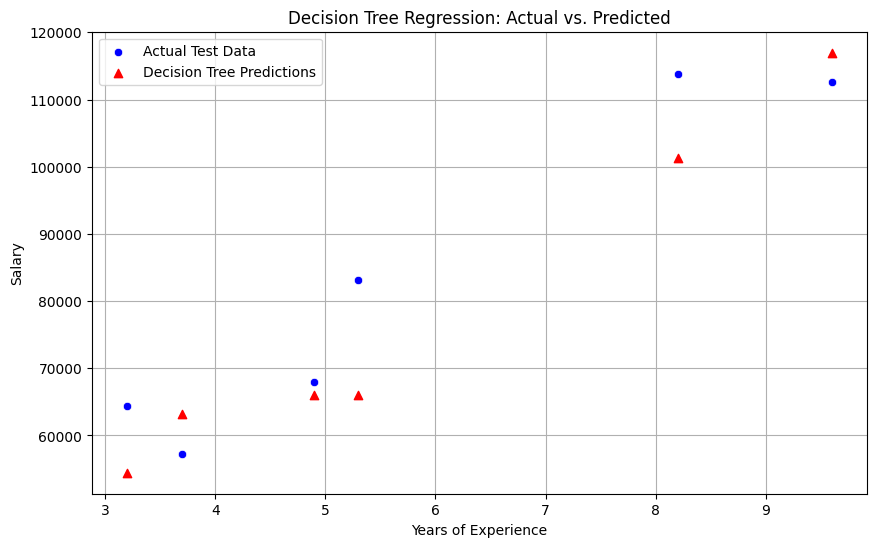

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Actual Test Data')
plt.scatter(X_test['YearsExperience'], dt.predict(X_test), color='red', label='Decision Tree Predictions', marker='^')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Decision Tree Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Results of Salary Prediction Modeling

This analysis compared different models for predicting salary based on experience:

* Linear, Polynomial, and Ridge Regression models were used, each with a different way of capturing the relationship.
* Decision Tree and Random Forest models offered an alternative, tree-based prediction method.

Polynomial Regression yielded the best results, indicating a non-linear connection between experience and salary in this dataset.